In [1]:
import pandas as pd

# Great! We have a dataset with various sales details. Let's follow the ETL (Extract-Transform-Load) process, analyze the data for sales trends, and explore key metrics and relationships between attributes.

Step 1: Extract and Load Data
We'll load the provided dataset into a pandas DataFrame for analysis.

In [2]:
df=pd.read_csv("Amazon Sales data.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


# Step 2: Transform Data
We'll clean and preprocess the data, and create new features for month-wise, year-wise, and yearly-month-wise analysis.

Cleaning and Preprocessing
Convert Dates: Convert 'Order Date' and 'Ship Date' to datetime.
Extract Features: Extract year, month, and create a 'Year-Month' column.
Handle Missing Values: Check and handle any missing values if present.

In [3]:
# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract year, month, and create 'Year-Month' column
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Display DataFrame with new columns
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Year-Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


# Step 3: Load Transformed Data
The transformed data is now in the DataFrame. We'll use it for analysis and visualization.

Step 4: Analysis
We'll calculate key metrics and analyze the data for sales trends:

Total Sales: Sum of 'Total Revenue'.
Average Monthly Sales: Average of 'Total Revenue' grouped by month.
Yearly Sales Trends: Sum of 'Total Revenue' grouped by year.
Yearly-Monthly Sales Trends: Sum of 'Total Revenue' grouped by 'Year-Month'.
Calculate Key Metrics

In [4]:
# Total Sales
total_sales = df['Total Revenue'].sum()

# Average Monthly Sales
avg_monthly_sales = df.groupby('Order Month')['Total Revenue'].mean()

# Yearly Sales Trends
yearly_sales = df.groupby('Order Year')['Total Revenue'].sum()

# Yearly-Monthly Sales Trends
yearly_monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum()

# Display metrics
total_sales, avg_monthly_sales, yearly_sales, yearly_monthly_sales


(137348768.31,
 Order Month
 1     1.497495e+06
 2     1.903117e+06
 3     5.687060e+05
 4     1.798576e+06
 5     1.201431e+06
 6     5.230326e+05
 7     1.305793e+06
 8     2.820412e+05
 9     1.062953e+06
 10    1.389780e+06
 11    2.285358e+06
 12    1.449892e+06
 Name: Total Revenue, dtype: float64,
 Order Year
 2010    19186024.92
 2011    11129166.07
 2012    31898644.52
 2013    20330448.66
 2014    16630214.43
 2015    12427982.86
 2016    12372867.22
 2017    13373419.63
 Name: Total Revenue, dtype: float64,
 Year-Month
 2010-02    3410661.12
 2010-05    2587973.26
 2010-06    1082418.40
 2010-10    6064933.75
 2010-11    3458252.00
 2010-12    2581786.39
 2011-01    1042225.35
 2011-02     387002.20
 2011-04    2798046.49
 2011-05     272410.45
 2011-06      19103.44
 2011-07      97040.64
 2011-09     574951.92
 2011-11    5938385.58
 2012-01    1012884.00
 2012-02    6707849.42
 2012-03     994765.42
 2012-04    4556012.38
 2012-05    3782781.82
 2012-06    2132075.27
 201

# Step 5: Visualize Trends and Relationships
We'll create visualizations to illustrate sales trends and relationships between attributes.

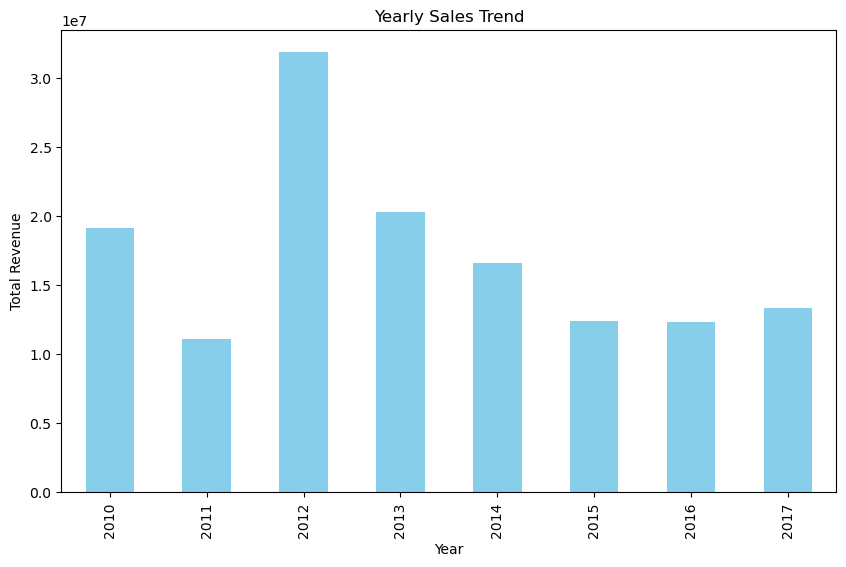

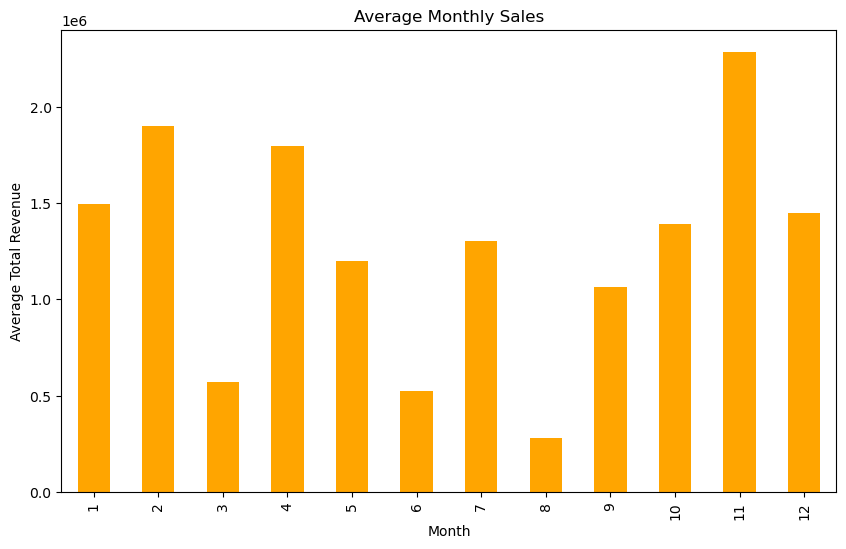

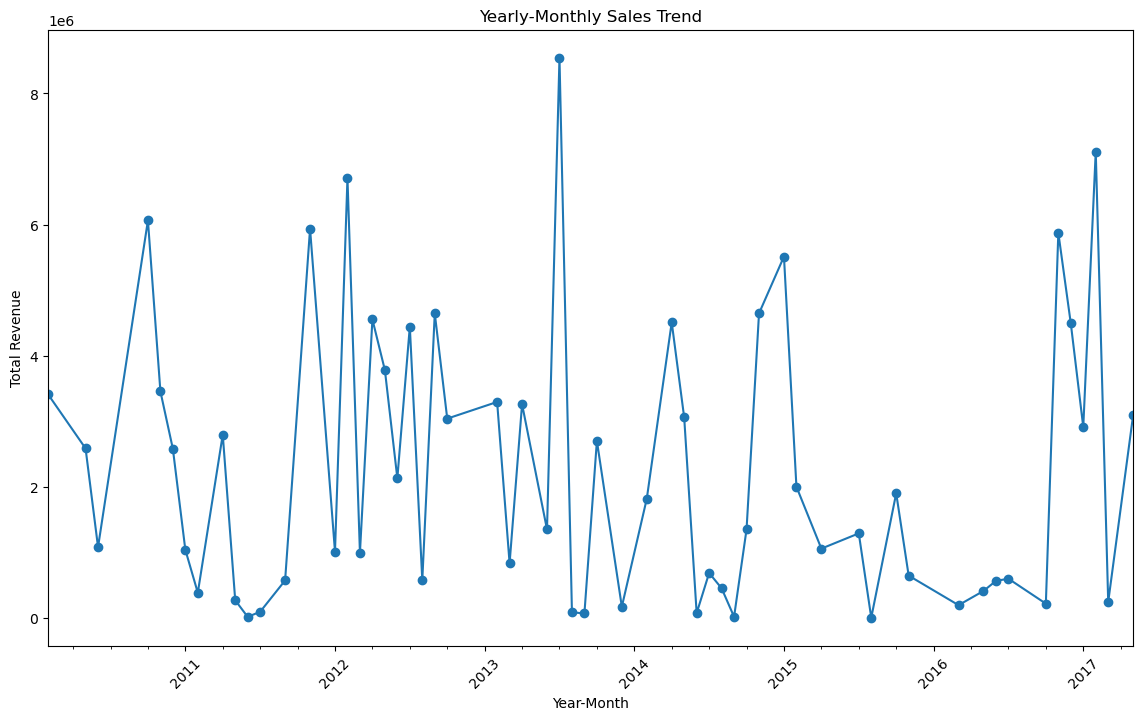

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Yearly Sales Trend
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

# Plotting Monthly Sales Trend
plt.figure(figsize=(10, 6))
avg_monthly_sales.plot(kind='bar', color='orange')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Total Revenue')
plt.show()

# Plotting Yearly-Monthly Sales Trend
plt.figure(figsize=(14, 8))
yearly_monthly_sales.plot(kind='line', marker='o')
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


# Step 6: Findings
Based on the visualizations and metrics:

Yearly Sales Trends: Identify significant sales spikes or dips in certain years.
Monthly Sales Trends: Discover patterns such as seasonal peaks or off-seasons.
Key Relationships: Investigate relationships between attributes like item type, sales channel, and their impact on total sales and profit.
Summary
This analysis provides insights into sales trends over time, highlights key metrics, and uncovers relationships between various attributes. For more detailed and specific findings, further exploration and more granular data would be beneficial.